In [5]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
%matplotlib inline
import random as rand

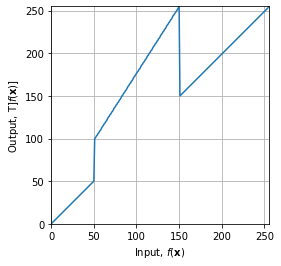

Text(0.5, 1.0, 'Transformed image white matter')

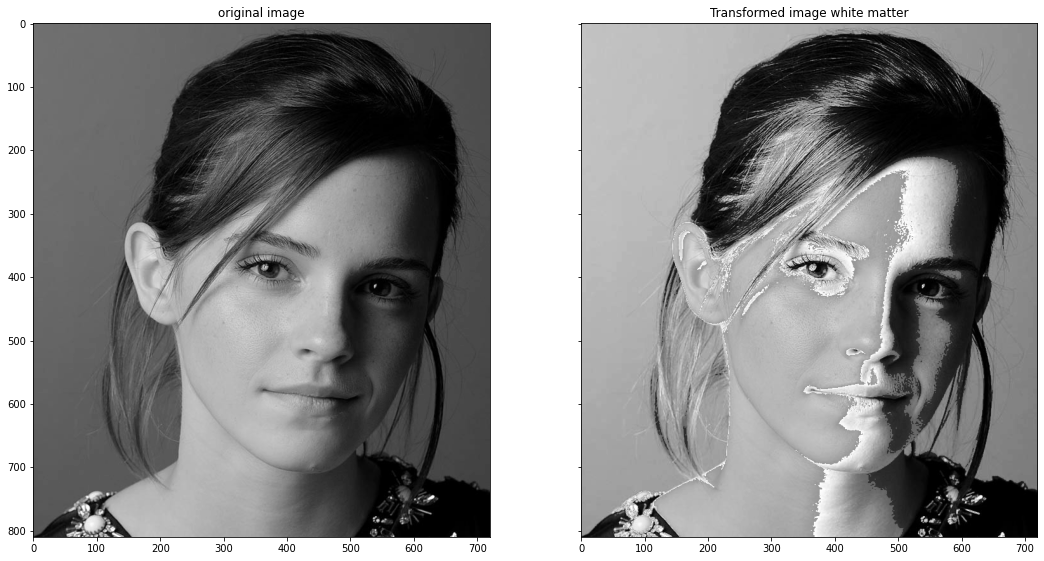

In [5]:

c= np.array([(50, 50), (50, 100) , (150, 255), (150,150) , (255,255)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1-0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np. linspace(c[1,1], c[2,1], c[2,0]-c[1,0]).astype('uint8')
t4 = np. linspace(c[2,1], c[3,1], c[3,0]-c[2,0]).astype('uint8')
t5 = np. linspace(c[3,1], c[4,1], c[4,0]-c[3,0]).astype('uint8')
transform = np.concatenate((t1,t2,t3,t4), axis=0).astype('uint8') 
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig,ax = plt.subplots() 
ax.plot(transform)

ax.set_xlabel(r'Input, $f(\mathbf {x})$') 
ax.set_ylabel('Output, $\mathrm{T}]f(\mathbf {x})]$')
ax.set_xlim (0,255)
ax.set_ylim (0,255) 
ax.set_aspect('equal')
plt. savefig('transform.png')
plt.grid()
plt.show()
img_orig = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform) 


# cv.imshow("Image",image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img_orig,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(image_transformed,cmap='gray')
ax[1].set_title('Transformed image white matter')


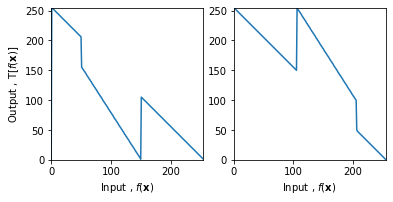

Text(0.5, 1.0, 'Transformed image gray matter')

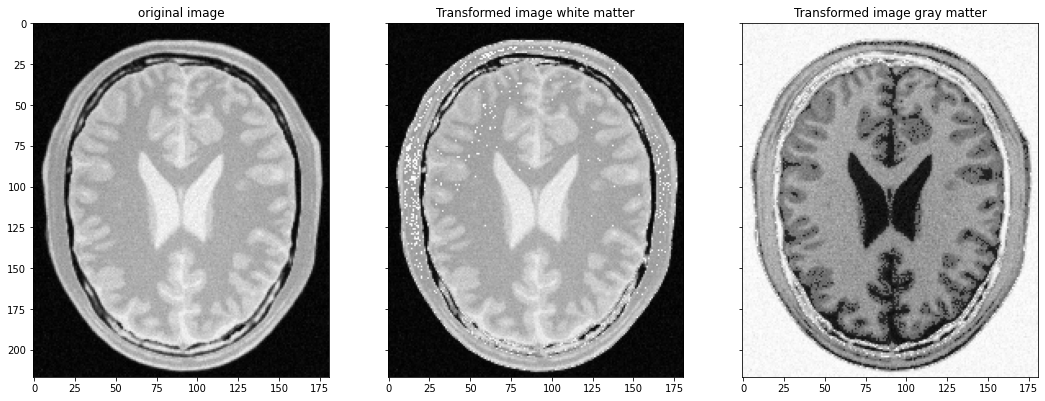

In [6]:


c=np.array([(50,50),(50,100),(150,150)])

t1=np.linspace(0,c[0,1],c[0,0]+1).astype('uint8')
t2=np.linspace(c[1,1]+1,255,c[2,0]-c[1,0]).astype('uint8')
t3=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')

transform= np.concatenate((t1,t2),axis=0).astype('uint8')
transform= np.concatenate((transform,t3),axis=0).astype('uint8')

c=np.array([(105,150),(205,100),(205,50)])

t_1=np.linspace(255,c[0,1],c[0,0]+1).astype('uint8')
t_2=np.linspace(255,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t_3=np.linspace(c[2,1],0,c[1,1]-c[2,1]).astype('uint8')


t_w= np.concatenate((t_1,t_2),axis=0).astype('uint8')
t_w= np.concatenate((t_w,t_3),axis=0).astype('uint8')

fig,ax=plt.subplots(1,2)
ax[0].plot(-transform)
ax[0].set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax[0].set_ylabel('Output , $\mathrm{T } [ f ( \mathbf { x } ) ] $')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[1].plot(t_w)
ax[1].set_xlabel(r'Input , $f ( \mathbf { x } ) $ ')
ax[1].set_xlim(0,255)
ax[1].set_ylim(0,255)
ax[1].set_aspect('equal')
plt.savefig('transform.png')
plt.show()

img_org =cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_trans_white = cv.LUT(img_org, transform)
image_trans_gray = cv.LUT(img_org, t_w)


fig, ax  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(18,18))
ax[0].imshow(img_org,cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(image_trans_white,cmap='gray')
ax[1].set_title('Transformed image white matter')
ax[2].imshow(image_trans_gray,cmap='gray')
ax[2].set_title('Transformed image gray matter')

In [2]:
def gammaCorrection(src, gamma):
    invGamma = 1 / gamma
 
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)
 
    return cv.LUT(src, table)

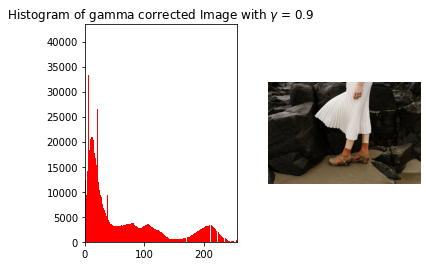

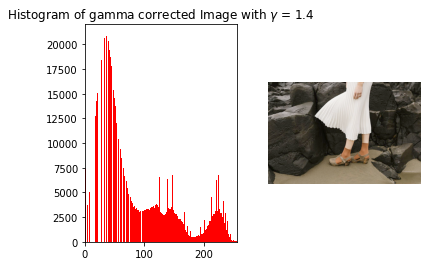

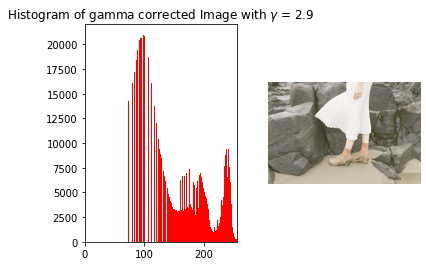

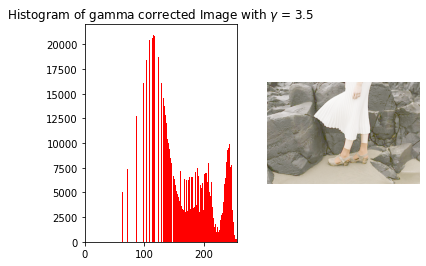

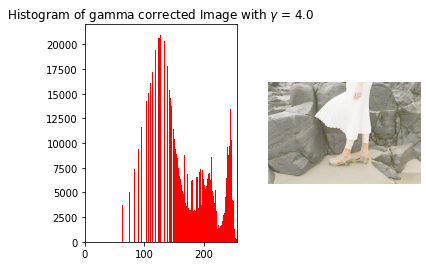

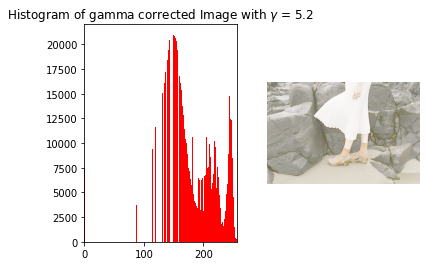

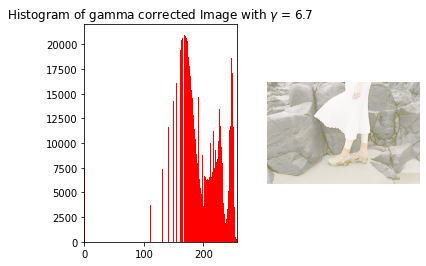

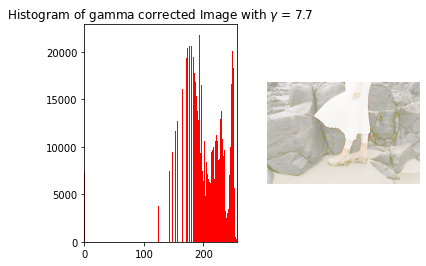

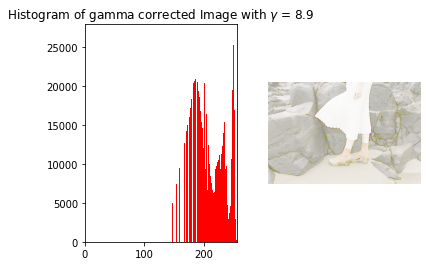

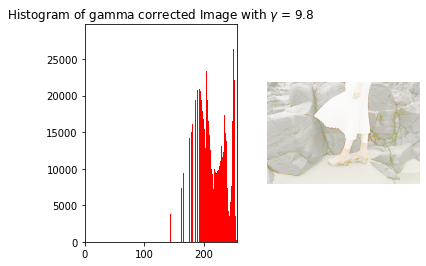

In [17]:
img = cv.imread('highlights_and_shadows.jpg')

for i in range(10):
    gamma = i+rand.randint(0,9)*0.1
    gammaImg = gammaCorrection(img,gamma)
    fig,ax=plt.subplots(1,2)
    ax[0].hist(gammaImg.flatten(),256,[0,256],color = 'r')
    ax[0].set_xlim([0,256])
    ax[0].set_title('Histogram of gamma corrected Image with $\gamma$ = {0}'.format(gamma))
    ax[1].imshow(cv.cvtColor(gammaImg,cv.COLOR_BGR2RGB))
    ax[1].axis('off')
    plt.show()
 
# cv.imshow('Original image', img)
# cv.imshow('Gamma corrected image', gammaImg)
# cv.waitKey(0)
# cv.destroyAllWindows()

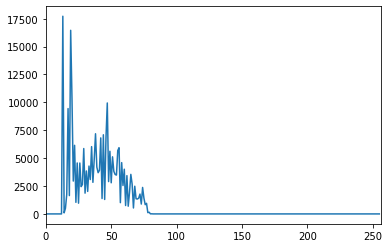

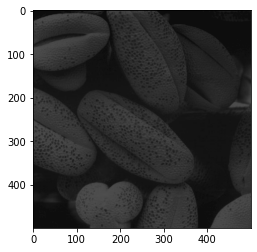

In [9]:
img=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
hist = cv.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0,256])
plt.show()
#plt.imshow(img)
img = cv.cvtColor(img,cv.COLOR_RGB2BGR)
plt.imshow(img)

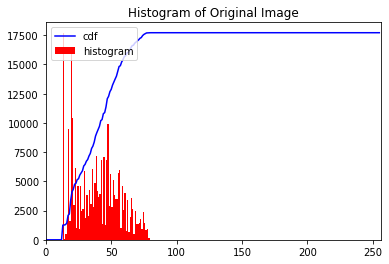

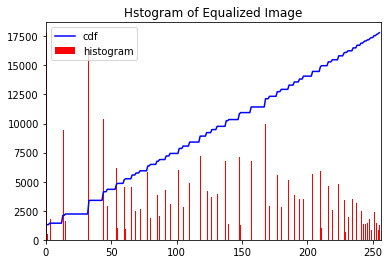

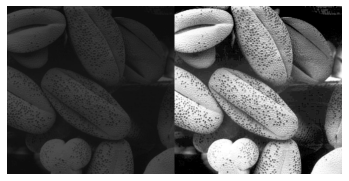

In [11]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized, color ='b')
plt.hist(img.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.title('Histogram of Original Image')
plt.show()
img=cv.imread('shells.png',cv.IMREAD_GRAYSCALE)
equ = cv.equalizeHist(img)
hist,bins = np.histogram(equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized =cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized ,color = 'b')
plt.hist(equ.flatten(),356,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'),loc = 'upper left')
plt.title('Hstogram of Equalized Image')
plt.show()
res = np.hstack((img,equ))
plt.axis('off')
plt.imshow(res,cmap='gray')




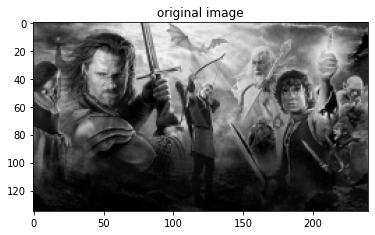

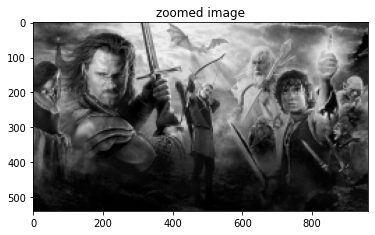

In [38]:
im = cv.imread('im01small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

scale = 4
rows = int(scale*im.shape[0]) 
cols= int(scale*im.shape[1])

zoomed = np.zeros((rows,cols), dtype=im.dtype) 
for i in range (0,rows):
    for j in range(0,cols):
        zoomed[i,j] = im[int(i/scale),int(j/scale)]
        
        
plt.imshow(cv.cvtColor(im,cv.COLOR_RGB2BGR))
plt.title("original image")
plt.show()
plt.imshow(cv.cvtColor(zoomed,cv.COLOR_RGB2BGR))
plt.title("zoomed image")
plt.show()